In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Question** **1**

In [ ]:
!unzip /content/drive/MyDrive/CS464/HW2/afhq_dog.zip

Archive:  /content/drive/MyDrive/CS464/HW2/afhq_dog.zip
replace afhq_dog/flickr_dog_000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace afhq_dog/flickr_dog_000003.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace afhq_dog/flickr_dog_000004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import numpy as np
from PIL import Image

In [ ]:
path = r'/content/afhq_dog'

In [ ]:
imageList = []
cnt = 0
for img in os.listdir(path):
  imgPath = os.path.join(path, img)
  #To find the index of the requested dog picture in Question 1.3
  if imgPath == "/content/afhq_dog/flickr_dog_000002.jpg":
    print(cnt)
  cnt +=1
  image = Image.open(imgPath).resize((64, 64), Image.BILINEAR)
  imageList.append(np.array(image).reshape(4096,3))
imageList = np.array(imageList).astype('float32')

3765


In [ ]:
#Separating R, G, and B channels
X0 = imageList[:,:,0]
X1 = imageList[:,:,1]
X2 = imageList[:,:,2]

Question **1.1**

In [ ]:
def PCA(x):
  #Calculating and subtracting mean
  x_mean = np.mean(x, axis = 0)
  x_new = x - x_mean
  #The inputs should be columns for np.cov()
  covariance = np.cov(x_new.T)
  #Eigenvalues and eigenvectors calculated 
  eig_val, eig_vec = np.linalg.eig(covariance)
  eig_vec = eig_vec.T
  #Sorting the eigenvalues in descending order and eigenvectors according to the sorted eigenvalues
  sort = np.argsort(eig_val)[::-1]
  eig_values = eig_val[sort]
  eig_vectors = eig_vec[sort]
  return eig_values, eig_vectors
  

In [ ]:
def PVE(eig_values):
  pve = eig_values/sum(eig_values)
  return pve

In [ ]:
def principal(eig_vectors, k):
  return eig_vectors[:k]

In [ ]:
e_val0, e_vec0 = PCA(X0)
e_val1, e_vec1 = PCA(X1)
e_val2, e_vec2 = PCA(X2)

In [ ]:
print("First 10 principal components for X_0 is", principal(e_vec0,10))

First 10 principal components for X_0 is [[-0.01154429 -0.01166243 -0.01177067 ... -0.01293393 -0.0128035
  -0.01266111]
 [ 0.03042403  0.03051302  0.03036561 ...  0.00831761  0.0094166
   0.01021059]
 [ 0.00390175  0.00393261  0.00417108 ... -0.02520587 -0.02480206
  -0.02401389]
 ...
 [-0.00627134 -0.00698603 -0.00727319 ...  0.02314602  0.02380235
   0.024148  ]
 [-0.01163628 -0.0118607  -0.01214642 ...  0.01792654  0.01756257
   0.01696853]
 [ 0.01800419  0.01891173  0.01945636 ...  0.02943485  0.02831576
   0.02681776]]


In [ ]:
print("First 10 principal components for X_1 is", principal(e_vec1,10))

First 10 principal components for X_1 is [[-0.01389697 -0.0139753  -0.0140778  ... -0.01349146 -0.01341022
  -0.01330947]
 [ 0.02876571  0.02895951  0.02893184 ...  0.00622275  0.00725797
   0.00800407]
 [-0.00360729 -0.00358177 -0.00377001 ...  0.02586264  0.02534018
   0.02453453]
 ...
 [ 0.01133708  0.01194203  0.0125373  ... -0.01710286 -0.01828332
  -0.01886373]
 [ 0.0119719   0.01220973  0.01289276 ... -0.0186563  -0.01846601
  -0.01792745]
 [ 0.01580207  0.01638304  0.01708802 ...  0.03199887  0.03098237
   0.02939357]]


In [ ]:
print("First 10 principal components for X_2 is", principal(e_vec2,10))

First 10 principal components for X_2 is [[ 0.01988104  0.01989448  0.01989821 ...  0.01538556  0.01547836
   0.01547276]
 [-0.02722114 -0.02732454 -0.0270892  ... -0.00297785 -0.00382878
  -0.00457466]
 [ 0.00463756  0.00459407  0.00478168 ... -0.02691698 -0.02619977
  -0.02534064]
 ...
 [ 0.01628492  0.01662573  0.01721791 ... -0.01456686 -0.01575925
  -0.01607885]
 [ 0.00572893  0.00584935  0.00579801 ...  0.0347244   0.03358471
   0.03195115]
 [-0.01989638 -0.02073726 -0.02189866 ... -0.0068848  -0.00625322
  -0.00568409]]


In [ ]:
#PVE's for each principal components
pve_0s = PVE(e_val0)[:10]
pve_1s = PVE(e_val1)[:10]
pve_2s = PVE(e_val2)[:10]

print("PVEs of the first 10 principal component of X_0 is ", pve_0s)
print("PVEs of the first 10 principal component of X_1 is ", pve_1s)
print("PVEs of the first 10 principal component of X_2 is ", pve_2s)

PVEs of the first 10 principal component of X_0 is  [0.21506811 0.13542096 0.07504082 0.05172646 0.0422859  0.02458043
 0.02177032 0.01989657 0.01706975 0.01655849]
PVEs of the first 10 principal component of X_1 is  [0.20045373 0.13767588 0.07695188 0.05396965 0.04291814 0.02602156
 0.02142609 0.02081249 0.0173932  0.01681111]
PVEs of the first 10 principal component of X_2 is  [0.22994562 0.1367701  0.07033232 0.05355895 0.0398173  0.02373058
 0.02098965 0.02075654 0.01668027 0.01629147]


In [ ]:
print("The sum of PVEs of the first 10 principal component of X_0 is ", sum(pve_0s))
print("The sum of PVEs of the first 10 principal component of X_1 is ", sum(pve_1s))
print("The sum of PVEs of the first 10 principal component of X_2 is ", sum(pve_2s))

The sum of PVEs of the first 10 principal component of X_0 is  0.6194178151737513
The sum of PVEs of the first 10 principal component of X_1 is  0.6144337490624742
The sum of PVEs of the first 10 principal component of X_2 is  0.6288728016020277


In [ ]:
store_k = []
k0 = 0 
k1 = 0 
k2 = 0 
while k0 < 4096:
  pve0 = PVE(e_val0)
  sum0 = sum(pve0[:k0])
  if sum0 >= 0.7:
    store_k.append(k0)
    break
  k0 += 1

while k1 < 4096:
  pve1 = PVE(e_val1)
  sum1 = sum(pve1[:k1])
  if sum1 >= 0.7:
    store_k.append(k1)
    break
  k1 += 1

while k2 < 4096:
  pve2 = PVE(e_val2)
  sum2 = sum(pve2[:k2])
  if sum2 >= 0.7:
    store_k.append(k2)
    break
  k2 += 1

print("Minimum number of principal components to acquire at least 70% PVE is", max(store_k))

Minimum number of principal components to acquire at least 70% PVE is 19


In [ ]:
print("Minimum number of principal components for X_0, X_1 and X_2 to acquire at least 70% PVE is", store_k, "respectively.")

Minimum number of principal components for X_0, X_1 and X_2 to acquire at least 70% PVE is [18, 19, 17] respectively.


Question **1.2**

In [ ]:
def reshaping(x, k, size1, size2):
  reshaped_arr = np.zeros((k, size1, size2))
  for i in range(k):
    reshaped_arr[i] = x[i].reshape(size1, size2)
  return reshaped_arr


In [ ]:
#Reshaping the principal components
reshaped_x0 = reshaping(e_vec0[:10],10,64,64)
reshaped_x1 = reshaping(e_vec1[:10],10,64,64)
reshaped_x2 = reshaping(e_vec2[:10],10,64,64)

In [ ]:
#Min-max scaling method
x_scaled0 = (reshaped_x0 - reshaped_x0.min())/(reshaped_x0.max() - reshaped_x0.min())
x_scaled1 = (reshaped_x1 - reshaped_x1.min())/(reshaped_x1.max() - reshaped_x1.min())
x_scaled2 = (reshaped_x2 - reshaped_x2.min())/(reshaped_x2.max() - reshaped_x2.min())

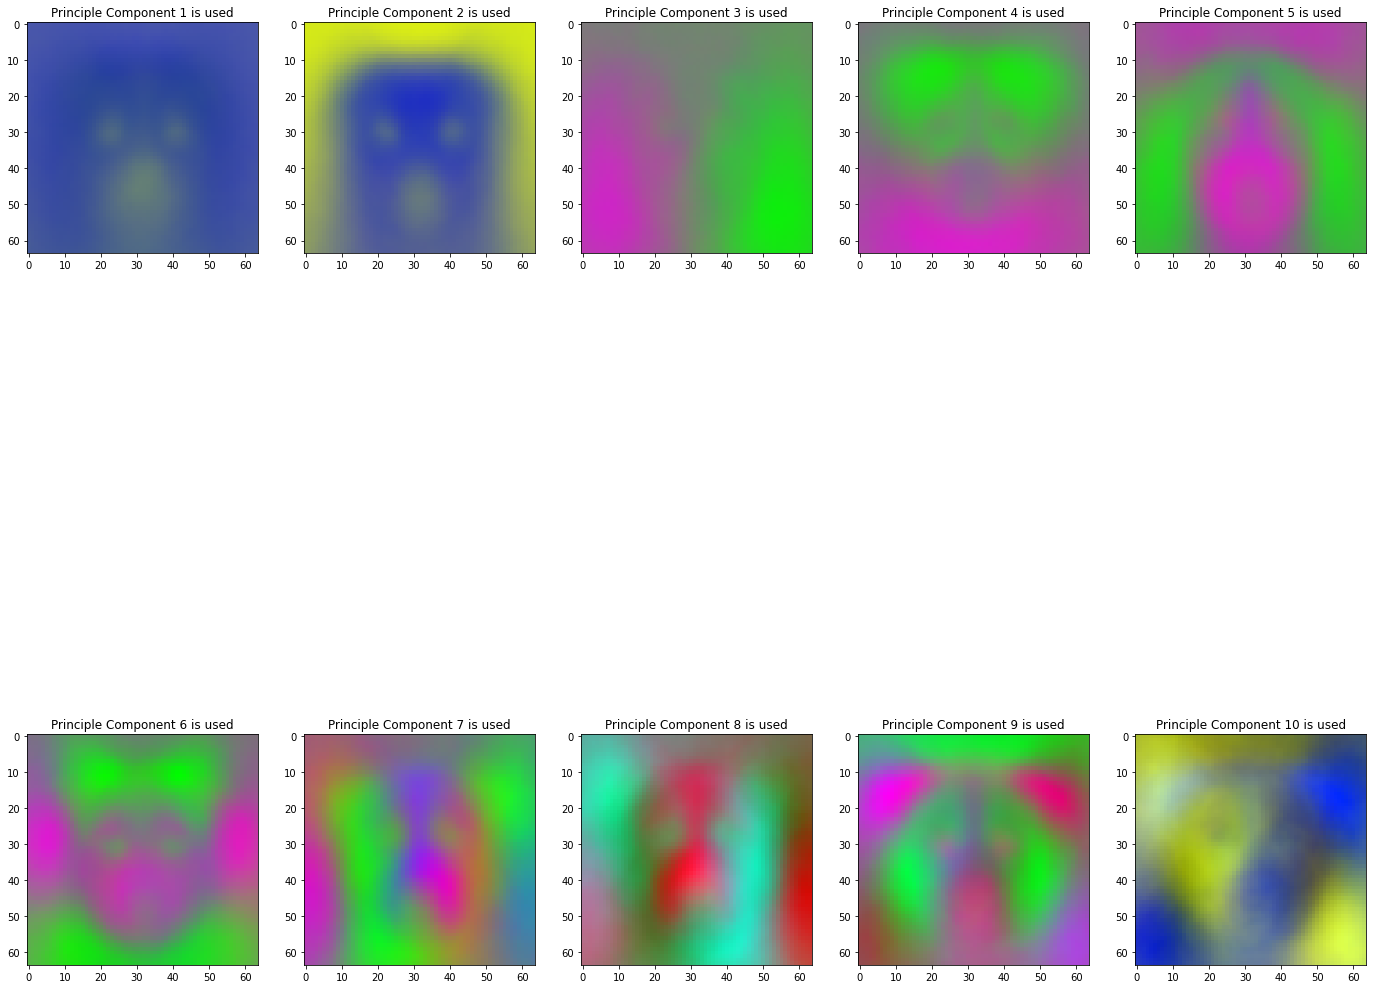

In [ ]:
#Displaying the principal components
import numpy as np
import matplotlib.pyplot as plt

RGB_list = []

fig, ax = plt.subplots(2, 5, figsize=(24,24))

for i in range(10):
  RGB = np.dstack((x_scaled0[i], x_scaled1[i], x_scaled2[i]))
  RGB_list.append(RGB)
  if i < 5:
    ax[0,i].imshow(RGB)
    ax[0,i].set_title(f"Principle Component {i+1} is used")
  else:
    ax[1,i-5].imshow(RGB)
    ax[1,i-5].set_title(f"Principle Component {i+1} is used")
plt.show()

**Question 1.3**

In [ ]:
#Subtracting the mean values to get zer0-mean channels
standardized_x0 = X0 - np.mean(X0)
standardized_x1 = X1 - np.mean(X1)
standardized_x2 = X2 - np.mean(X2)

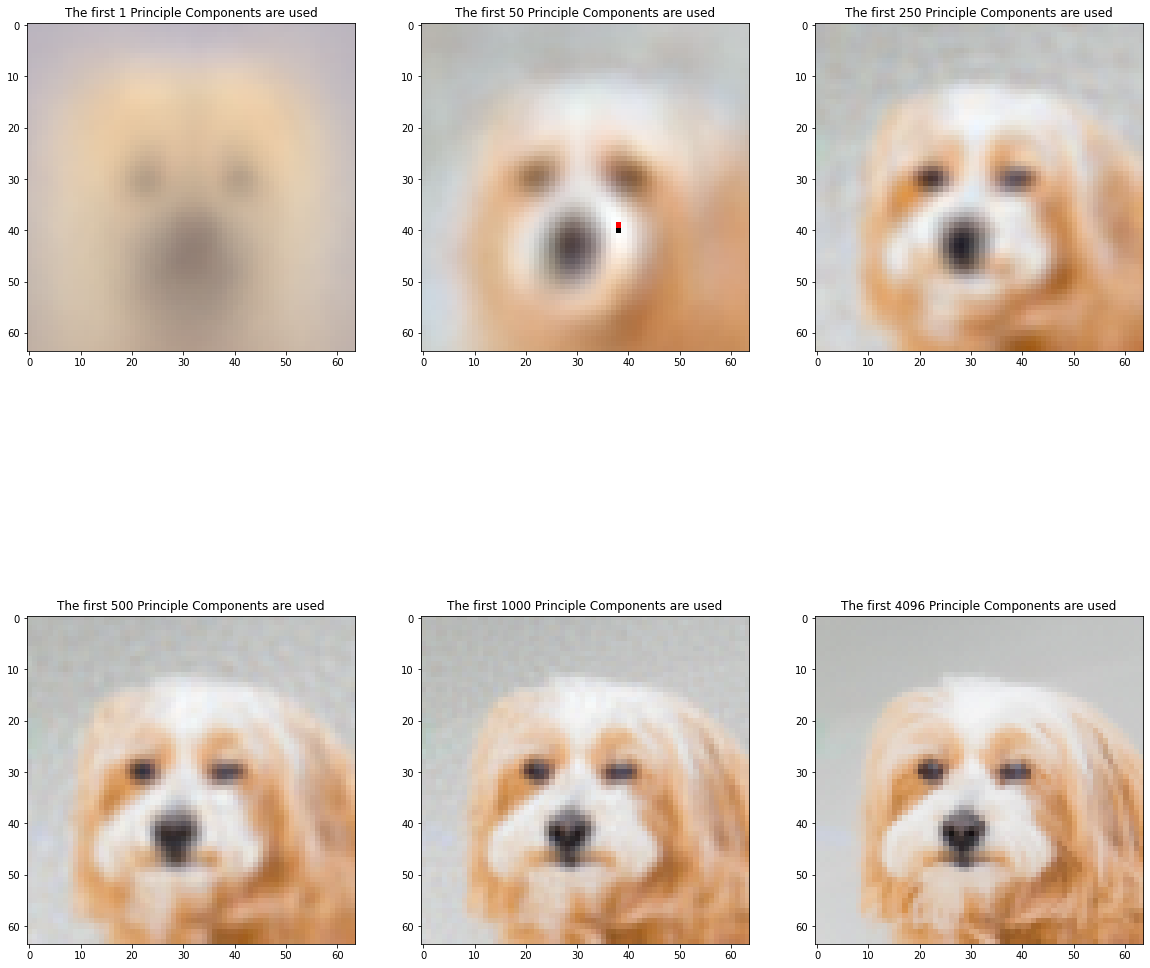

In [ ]:
#Displaying principal components by merging the RGB channels
k_list = [1,50,250,500,1000,4096]
cnt = 0
fig, ax = plt.subplots(2,3, figsize=(20,20))

for k in k_list:

  #k principal components
  eig_vec0 = principal(e_vec0,k)
  eig_vec1 = principal(e_vec1,k)
  eig_vec2 = principal(e_vec2,k)

  #Dot product of the image and all of the principal components
  #The requested picture is in the 3765th index of the image list
  dot_product0 = np.dot(eig_vec0,standardized_x0[3765])
  dot_product1 = np.dot(eig_vec1,standardized_x1[3765])
  dot_product2 = np.dot(eig_vec2,standardized_x2[3765])


  #Projection of the data onto the original space and adding the mean 
  recons0 = np.dot(dot_product0,eig_vec0) + np.mean(X0)
  recons1 = np.dot(dot_product1,eig_vec1) + np.mean(X1)
  recons2 = np.dot(dot_product2,eig_vec2) + np.mean(X2)

  #Reshaping the reconstructed image 
  reshaped0 = recons0.reshape(64,64)
  reshaped1 = recons1.reshape(64,64)
  reshaped2 = recons2.reshape(64,64)


  #Merge RGB channels
  img = np.dstack((reshaped0, reshaped1, reshaped2))

  if cnt < 3:
    ax[0,cnt].imshow(img.astype('uint8'))
    ax[0,cnt].set_title(f"First {k} Principle Components are used")
  else:
    ax[1,cnt-3].imshow(img.astype('uint8'))
    ax[1,cnt-3].set_title(f"First {k} Principle Components are used")
  cnt += 1

plt.show()


# **Question** **2**

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/CS464/HW2/dataset.csv')  

In [4]:
dataset

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,label
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,1
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,2.930406,2.376523,9.487627,6.187797,3.343416,-1.449106,-0.658054,-1.236256,0.601709,0.813512,0.779642,0.608385,0
59996,3.392299,2.954947,1.274827,6.894759,4.349512,-0.952437,-1.663661,-1.733414,0.502079,0.285880,0.567242,0.366120,1
59997,2.364034,8.776391,2.842030,1.008906,4.299976,-0.943884,-1.380719,-1.975373,0.487838,0.149286,0.986505,0.145984,1
59998,9.631511,2.757071,3.994398,7.821347,2.514755,-0.649915,-0.966330,-0.898510,0.365246,0.889118,0.587558,0.818391,0


In [5]:
#Shuffling the dataset
dataset = dataset.sample(frac = 1)

In [6]:
# 70% for training set
training_set = dataset[:42000]
# 10% for validation set
validation_set = dataset[42000:48000]
# 20% for test dataset
test_set = dataset[48000:]

In [7]:
import numpy as np
train_sc = np.ndarray(training_set.shape)
print(train_sc.shape)
valid_sc = np.ndarray(validation_set.shape)
print(valid_sc.shape)
test_sc = np.ndarray(test_set.shape)
print(test_sc.shape)

(42000, 13)
(6000, 13)
(12000, 13)


In [8]:
#Separating the labels and rest of the dataset
train_label = training_set['label'].to_numpy()
validation_label = validation_set['label'].to_numpy()
test_label = test_set['label'].to_numpy()

training_set = training_set.drop(labels=['label'], axis=1)
validation_set = validation_set.drop(labels=['label'], axis=1)
test_set = test_set.drop(labels=['label'], axis=1)

In [9]:
#Scaling all dataset according to training data
for ii in range(training_set.shape[1]):
  maxVal = training_set.iloc[:,ii].max()
  minVal = training_set.iloc[:,ii].min()
  train_sc[:,ii] = (training_set.iloc[:,ii]-minVal)/(maxVal-minVal)
  valid_sc[:,ii] = (validation_set.iloc[:,ii]-minVal)/(maxVal-minVal)
  test_sc[:,ii] = (test_set.iloc[:,ii]-minVal)/(maxVal-minVal)

In [10]:
def TrainAndTest(batch_size,w,b,x_train_set,x_val,y_train_set,y_val,alpha):

  sample_size, feature_size = x_train_set.shape

  #Sample size may not be a factor of batch size
  excess = sample_size % batch_size
  if excess != 0:
    x_train = x_train_set[:-excess,:]
    y_train = y_train_set[:-excess]
  else:
    x_train = x_train_set
    y_train = y_train_set

  epoch_acc = []
  for k in range(100):

    #Gradient calculation
    for i in range(0,sample_size-batch_size,batch_size):

      #Sigmoid function
      sigmoid = 1/(1+np.exp(-(np.dot(x_train[i:i+batch_size,:],w)+b)))

      #Gradient Ascent Algorithm
      grad_w = (1/batch_size)*np.dot(x_train[i:i+batch_size,:].T, (y_train[i:i+batch_size]-sigmoid))
      grad_b = (1/batch_size)*np.sum(y_train[i:i+batch_size]-sigmoid)

      #Parameter update
      w += alpha*grad_w
      b += alpha*grad_b
          
    #Logistic Regression Algorithm
    y_pred = np.zeros(len(x_val))
    sigmoid_val = 1/(1+np.exp(-(np.dot(x_val,w)+b)))
    y_pred = np.array([1 if ind > 0.5 else 0 for ind in sigmoid_val])

    #Accuracy calculation
    acc = np.sum(y_val == y_pred)/len(y_val)
    epoch_acc.append(acc)

  return epoch_acc, y_pred

Question **2.1**

In [11]:
#Gaussian initialization
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Stochastic Gradient  Ascent
accuracy, y_pred_stoc = TrainAndTest(1,weights,bias,train_sc,valid_sc,train_label,validation_label,0.01)

In [12]:
#Gaussian initialization
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Full-Batch Gradient Ascent
accuracy_full, y_pred_full = TrainAndTest(42000,weights,bias,train_sc,valid_sc,train_label,validation_label,0.01)

In [13]:
#Gaussian initialization
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Mini-Batch Gradient Ascent with batch_size = 64
accuracy_mini, y_pred_mini = TrainAndTest(64, weights, bias, train_sc, valid_sc, train_label, validation_label, 0.01)

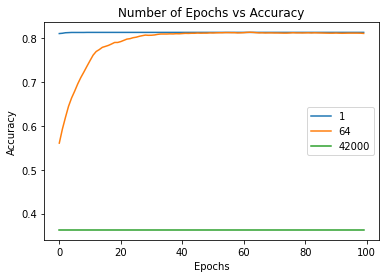

In [14]:
import matplotlib.pyplot as plt

# plotting the graph
epochs = np.array(range(100))
plt.plot(epochs, accuracy, label = '1')
plt.plot(epochs, accuracy_mini, label ='64')  
plt.plot(epochs, accuracy_full, label ='42000')


# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to the graph
plt.title('Number of Epochs vs Accuracy')

# function to show the legend names
plt.legend() 
# function to show the plot
plt.show()


In [15]:
#Batch_size = 1 is chosen as the hyperparameter
#Gaussian initialization
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Stochastic Gradient  Ascent
accuracy_best, y_pred = TrainAndTest(1,weights,bias,train_sc,test_sc,train_label,test_label,0.01)
print(accuracy_best)

[0.6655, 0.69725, 0.7068333333333333, 0.7103333333333334, 0.7120833333333333, 0.7125, 0.7125833333333333, 0.7125833333333333, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.712416666666

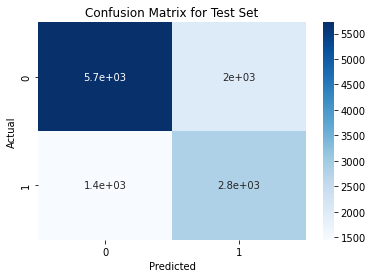

In [16]:
#Drawing the confusion matrix
import pandas as pd
import seaborn as sn
y_true = pd.Categorical(test_label)
y_predicted = pd.Categorical(y_pred)
confusion_matrix = pd.crosstab(y_true, y_predicted, rownames=['Actual'], colnames=['Predicted'], dropna=False)
plt.figure()
plt.title('Confusion Matrix for Test Set')
sn.heatmap(confusion_matrix, cmap="Blues",  annot=True)

**Question** **2.2**

In [17]:
#Uniform Distribution 
np.random.seed(0)
weights = np.random.uniform(size = train_sc.shape[1])
bias = np.random.uniform(size = 1)
#For Mini-Batch Gradient Ascent with batch_size = 64
accuracy_uniform, pred_y_uni = TrainAndTest(64, weights, bias, train_sc, valid_sc, train_label, validation_label, 0.01)
print(accuracy_uniform)

[0.6375, 0.6388333333333334, 0.647, 0.6633333333333333, 0.6816666666666666, 0.6988333333333333, 0.7168333333333333, 0.729, 0.7418333333333333, 0.7516666666666667, 0.7591666666666667, 0.7658333333333334, 0.7715, 0.7738333333333334, 0.7773333333333333, 0.7806666666666666, 0.7826666666666666, 0.7868333333333334, 0.7895, 0.791, 0.7941666666666667, 0.7948333333333333, 0.7986666666666666, 0.8001666666666667, 0.8013333333333333, 0.804, 0.8053333333333333, 0.8063333333333333, 0.8065, 0.8073333333333333, 0.807, 0.8081666666666667, 0.8083333333333333, 0.8086666666666666, 0.8098333333333333, 0.8111666666666667, 0.8103333333333333, 0.8105, 0.8115, 0.812, 0.8111666666666667, 0.8111666666666667, 0.811, 0.8113333333333334, 0.812, 0.8118333333333333, 0.8123333333333334, 0.812, 0.813, 0.813, 0.8128333333333333, 0.8126666666666666, 0.813, 0.8128333333333333, 0.8133333333333334, 0.813, 0.813, 0.8126666666666666, 0.813, 0.8133333333333334, 0.8135, 0.8136666666666666, 0.8133333333333334, 0.8128333333333333

In [18]:
#Zeros Distribution 
weights = np.zeros(train_sc.shape[1])
bias = np.zeros(1)
#For Mini-Batch Gradient Ascent with batch_size = 64
accuracy_zeros, pred_y_zeros = TrainAndTest(64, weights, bias, train_sc, valid_sc, train_label, validation_label, 0.01)
print(accuracy_zeros)

[0.6375, 0.6375, 0.6475, 0.6681666666666667, 0.6916666666666667, 0.7093333333333334, 0.727, 0.7368333333333333, 0.7483333333333333, 0.7591666666666667, 0.7671666666666667, 0.7716666666666666, 0.7758333333333334, 0.7785, 0.7801666666666667, 0.7843333333333333, 0.7865, 0.7896666666666666, 0.7905, 0.7921666666666667, 0.795, 0.7978333333333333, 0.7996666666666666, 0.8016666666666666, 0.8035, 0.806, 0.8065, 0.8063333333333333, 0.8068333333333333, 0.8075, 0.8076666666666666, 0.8085, 0.809, 0.8103333333333333, 0.8103333333333333, 0.8103333333333333, 0.8105, 0.811, 0.812, 0.8115, 0.8111666666666667, 0.8115, 0.8115, 0.8116666666666666, 0.812, 0.8123333333333334, 0.812, 0.8123333333333334, 0.8128333333333333, 0.8126666666666666, 0.8125, 0.8128333333333333, 0.813, 0.8133333333333334, 0.8131666666666667, 0.813, 0.8128333333333333, 0.8128333333333333, 0.8133333333333334, 0.8135, 0.8136666666666666, 0.8135, 0.813, 0.8128333333333333, 0.8123333333333334, 0.8125, 0.8126666666666666, 0.8126666666666666

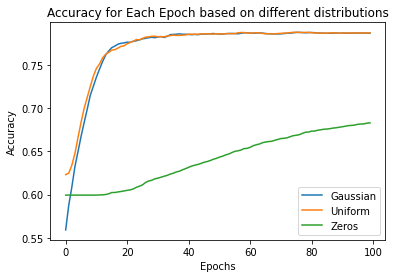

In [ ]:
import matplotlib.pyplot as plt
# plotting the graph 
epochs = np.array(range(100))
plt.plot(epochs, accuracy_mini, label = 'Gaussian')
plt.plot(epochs, accuracy_uniform, label ='Uniform')  
plt.plot(epochs, accuracy_zeros, label ='Zeros')

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to the graph
plt.title('Accuracy for Each Epoch based on different distributions')
# function to show the legend names  
plt.legend() 
# function to show the plot
plt.show()

In [19]:
#initialization = Gaussian is chosen as the hyperparameter
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Mini-Batch Gradient Ascent with batch_size = 64
accuracy_mini_best, y_pred_mini_best = TrainAndTest(64, weights, bias, train_sc, test_sc, train_label, test_label, 0.01)
print(accuracy_mini_best)

[0.5231666666666667, 0.52825, 0.5305, 0.53175, 0.5316666666666666, 0.5321666666666667, 0.5325, 0.5336666666666666, 0.5348333333333334, 0.5363333333333333, 0.5385833333333333, 0.5408333333333334, 0.5438333333333333, 0.54675, 0.55025, 0.553, 0.5574166666666667, 0.5628333333333333, 0.56725, 0.5716666666666667, 0.575, 0.5795833333333333, 0.58275, 0.5871666666666666, 0.5901666666666666, 0.5926666666666667, 0.5963333333333334, 0.5995, 0.6026666666666667, 0.606, 0.6093333333333333, 0.6116666666666667, 0.6146666666666667, 0.6184166666666666, 0.6205, 0.6238333333333334, 0.6261666666666666, 0.6281666666666667, 0.6305833333333334, 0.63275, 0.63475, 0.6358333333333334, 0.6374166666666666, 0.6394166666666666, 0.6413333333333333, 0.643, 0.6438333333333334, 0.6455, 0.6465833333333333, 0.6480833333333333, 0.6505, 0.6516666666666666, 0.6529166666666667, 0.6543333333333333, 0.65575, 0.6565833333333333, 0.6578333333333334, 0.6594166666666667, 0.66075, 0.6615, 0.6629166666666667, 0.66325, 0.66366666666666

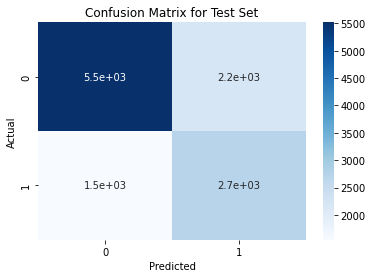

In [21]:
#Drawing the confusion matrix
import pandas as pd
import seaborn as sn
y_true = pd.Categorical(test_label)
y_predicted = pd.Categorical(y_pred_mini_best)
confusion_matrix = pd.crosstab(y_true, y_predicted, rownames=['Actual'], colnames=['Predicted'], dropna=False)
plt.figure()
plt.title('Confusion Matrix for Test Set')
sn.heatmap(confusion_matrix, cmap="Blues",  annot=True)

**Question 2.3**

In [33]:
#Trying different learning rates
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)

#For Stochastic Gradient Ascent with batch_size = 1
preds = []
acc_score = []
learning_rate = [1, 0.001, 0.0001, 0.00001]
for alpha in learning_rate:
  accuracy, y_pred = TrainAndTest(1, weights, bias, train_sc, valid_sc, train_label, validation_label, alpha)
  acc_score.append(accuracy)
  preds.append(y_pred)
print(acc_score)

[[0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667, 0.7891666666666667

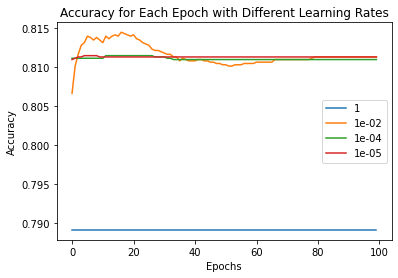

In [34]:
import matplotlib.pyplot as plt
# plotting the graph 
epochs = np.array(range(100))
plt.plot(epochs, acc_score[0], label = '1')
plt.plot(epochs, acc_score[1], label ='1e-02')  
plt.plot(epochs, acc_score[2], label ='1e-04')
plt.plot(epochs, acc_score[3], label ='1e-05')

# naming the x axis
plt.xlabel('Epochs')
# naming the y axis
plt.ylabel('Accuracy')
  
# giving a title to the graph
plt.title('Accuracy for Each Epoch with Different Learning Rates')
  
plt.legend() 
# function to show the plot
plt.show()
#Draw the plots

In [39]:
#learning_rate = 0.01 is chosen as the hyperparameter
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Stochastic Gradient  Ascent
accuracy_lr_best, y_lr_pred = TrainAndTest(1,weights,bias,train_sc,test_sc,train_label,test_label,0.01)
print(accuracy_lr_best)

[0.6655, 0.69725, 0.7068333333333333, 0.7103333333333334, 0.7120833333333333, 0.7125, 0.7125833333333333, 0.7125833333333333, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.7124166666666667, 0.712416666666

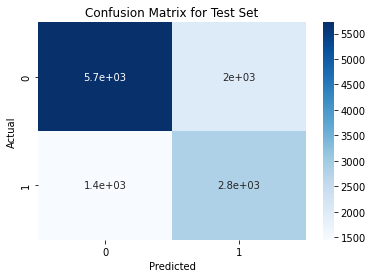

In [40]:
#Drawing the confusion matrix
import seaborn as sn
y_true = pd.Categorical(test_label)
y_predicted = pd.Categorical(y_lr_pred)
confusion_matrix = pd.crosstab(y_true, y_predicted, rownames=['Actual'], colnames=['Predicted'], dropna=False)
plt.figure()
plt.title('Confusion Matrix for Test Set')
sn.heatmap(confusion_matrix, cmap="Blues",  annot=True)

**Question 2.4**

In [41]:
#The best model is formed using the chosen hyperparameters 
#learning_rate = 0.01, batch_size = 1, initialization = Gaussian
np.random.seed(0)
weights = np.random.randn(train_sc.shape[1])
bias = np.random.randn(1)
#For Stochastic Gradient Ascent
accuracy_best, y_best_pred = TrainAndTest(1,weights,bias,train_sc,test_sc,train_label,test_label,0.01)

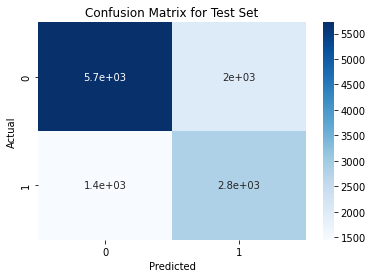

In [42]:
#Drawing the confusion matrix of the best model
import seaborn as sn
y_true = pd.Categorical(test_label)
y_predicted = pd.Categorical(y_best_pred)
confusion_matrix = pd.crosstab(y_true, y_predicted, rownames=['Actual'], colnames=['Predicted'], dropna=False)
plt.figure()
plt.title('Confusion Matrix for Test Set')
sn.heatmap(confusion_matrix, cmap="Blues",  annot=True)

In [43]:
#Calculation of metrics
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(test_label)):
  if test_label[i] == y_best_pred[i]:
    if test_label[i] == 0:
      tp += 1
    else:
      tn += 1
  else:
    if test_label[i] == 0:
      fn += 1
    else:
      fp += 1

accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
F_1_score = 2*precision*recall/(precision+recall)
F_2_score = 5*precision*recall/(4*precision+recall)
F_05_score = 1.25*precision*recall/((0.25)*precision+recall)
fpr = fp/(fp+tn)

print("Accuracy of the best model is", accuracy)
print("Precision of the best model is", precision)
print("Recall of the best model is", recall)
print("F1 score of the best model is", F_1_score)
print("F2 score of the best model is", F_2_score)
print("F0.5 score of the best model is", F_05_score)
print("False Positive Rate of the best model is", fpr)

Accuracy of the best model is 0.7124166666666667
Precision of the best model is 0.7978797600781141
Recall of the best model is 0.7407407407407407
F1 score of the best model is 0.7682492780874355
F2 score of the best model is 0.7515043224636728
F0.5 score of the best model is 0.785757459201055
False Positive Rate of the best model is 0.3387096774193548
